# Titanic survival prediction

## Import libraries and functions

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Read input files

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

## Exploratory data analysis
First, let's start exploring the whole training data.
Second, let's explore each particular variable by calculating some statistical values, missing values, representations and some categorical classifications in order to see approximately some relationships between variables.
When looking at missing values, some fixes will also be performed.

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pasic, Mr. Jakob",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Pclass, Sex, SibSp, Parch, Embarked

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


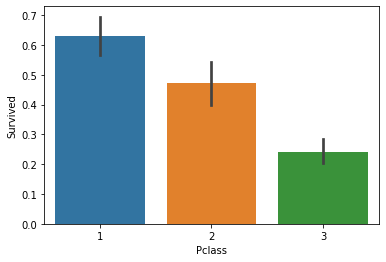



Sex
male      577
female    314
Name: Sex, dtype: int64
Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64


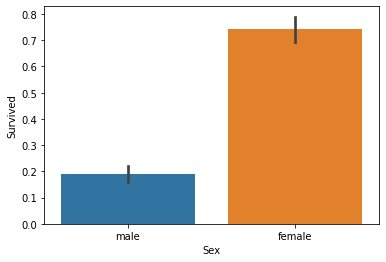



SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64


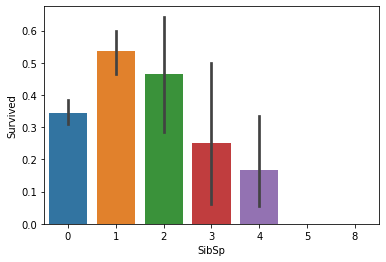



Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64
Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64


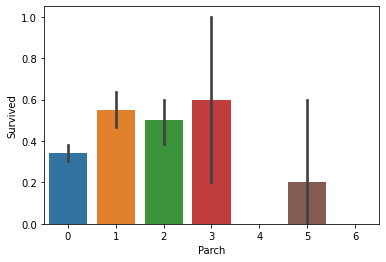



Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64


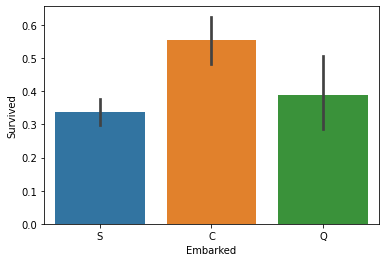

In [8]:
columns_to_explore = ['Pclass','Sex','SibSp','Parch','Embarked']

for column in columns_to_explore:
    print(column)
    print(train_data[column].value_counts())
    print(train_data.groupby(column).Survived.value_counts())
    sns.barplot(x=column, y='Survived', data=train_data)
    plt.show()
    print('\n')

As columns 'Sex' and 'Embarked' are categorical but not numerical, let's transform them in numbers. Also, as embarked had two missing values, just suppose they were "S".

In [9]:
train_data['Embarked'].isnull().sum()

2

In [10]:
datasets = [train_data, test_data]
for dataset in datasets:
    dataset['Sex_num'] = dataset['Sex'].map({'male': 0, 'female': 1})
    dataset['Embarked_num'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    dataset.loc[dataset['Embarked_num'].isnull(), 'Embarked_num'] = 0

### Names

In [11]:
train_data['titles'] = [name.split(', ')[1].split('.')[0] for name in train_data['Name']]
train_data['titles'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
the Countess      1
Jonkheer          1
Don               1
Ms                1
Capt              1
Lady              1
Sir               1
Mme               1
Name: titles, dtype: int64

In [12]:
for dataset in datasets:
    dataset['titles_num'] = train_data['titles'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4}).fillna(5)
    print(dataset['titles_num'].value_counts())

0.0    517
1.0    182
2.0    125
3.0     40
5.0     20
4.0      7
Name: titles_num, dtype: int64
0.0    228
1.0    101
2.0     58
3.0     23
5.0      5
4.0      3
Name: titles_num, dtype: int64


0.0    517
1.0    182
2.0    125
3.0     40
5.0     20
4.0      7
Name: titles_num, dtype: int64
titles_num  Survived
0.0         0           436
            1            81
1.0         1           127
            0            55
2.0         1            99
            0            26
3.0         1            23
            0            17
4.0         0             4
            1             3
5.0         0            11
            1             9
Name: Survived, dtype: int64


<AxesSubplot:xlabel='titles_num', ylabel='Survived'>

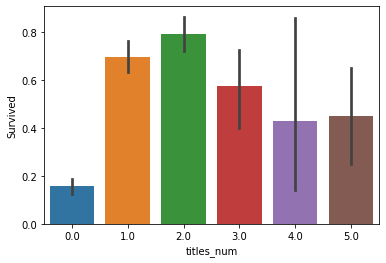

In [13]:
print(train_data['titles_num'].value_counts())
print(train_data.groupby('titles_num').Survived.value_counts())
sns.barplot(x='titles_num', y='Survived', data=train_data)

### Age
There are many missing values in the age column. Let's see if there is any relationship with the age (grouped by 5-year bins). In that case, missing values will be statistically infered

25.0    230
35.0    155
15.0    115
45.0     86
5.0      64
55.0     42
65.0     17
75.0      5
85.0      0
Name: Age_bin, dtype: int64


<AxesSubplot:xlabel='Age_bin', ylabel='Survived'>

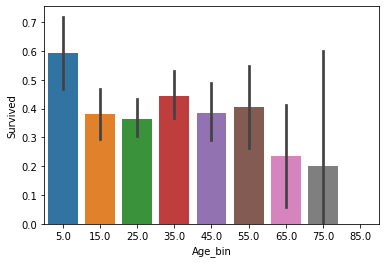

In [14]:
labels = [str(x) for x in np.linspace(5,85,9)]
train_data['Age_bin'] = pd.cut(train_data['Age'], bins=np.linspace(0,90,10), labels = labels)
print(train_data['Age_bin'].value_counts())
sns.barplot(x='Age_bin', y='Survived', data=train_data)

Age seems to be a valuable attribue, so let's try to fill the nan values with random values following the dataset distribution

In [15]:
for dataset in datasets:
    age_mean = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_nan_size = dataset['Age'].isnull().sum()
    rand_age = np.random.randint(age_mean - age_std, age_mean + age_std, size = age_nan_size)
    dataset['Age_nomiss'] = dataset['Age']
    dataset.loc[np.isnan(dataset['Age']), 'Age_nomiss'] = rand_age

### Tickets
Let's have some insights on the ticket column

In [16]:
train_data ['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

It seems that information is not of much use.

### Fare
Let's have some insights on the fare column.

In [17]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

10     319
40     158
100    123
15     122
25      99
600     53
0       15
5        2
Name: Fare_bin, dtype: int64


<AxesSubplot:xlabel='Fare_bin', ylabel='Survived'>

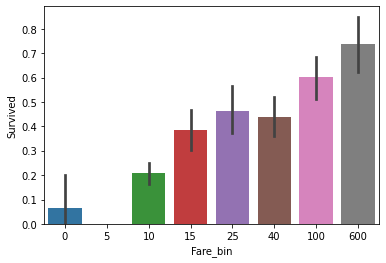

In [18]:
bins = [-0.1, 1, 5, 10, 15, 25, 40, 100, 600]
labels = ['0', '5', '10', '15', '25', '40', '100', '600']
train_data['Fare_bin'] = pd.cut(train_data['Fare'], bins=bins, labels = labels)
print(train_data['Fare_bin'].value_counts())
sns.barplot(x='Fare_bin', y='Survived', data=train_data)

There is clearly a correlation with the Fare of the ticket

### Cabin
Let's try to see some insights about the Cabin data.

In [19]:
train_data['Cabin'].isnull().sum()

687

In [20]:
train_data.loc[train_data['Cabin'].isnull() == False, 'Cabin']

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

First letter of the cabin number seems to have some meaning. However, there are many missing values as to consider it a valuable variable.

### Variable pairs relationships
Let's look at some relationships between variables using violin plots.

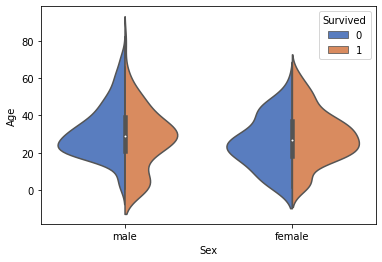

In [21]:
ax = sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_data, palette="muted", split=True)

## Definition of a model

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           714 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      889 non-null    object  
 12  Sex_num       891 non-null    int64   
 13  Embarked_num  891 non-null    float64 
 14  titles        891 non-null    object  
 15  titles_num    891 non-null    float64 
 16  Age_bin       714 non-null    category
 17  Age_nomiss    891 non-null    float64 
 18  Fare_bin  

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

features = ['Pclass', 'Sex_num', 'Age_nomiss', 'SibSp',
            'Parch', 'titles_num', 'Embarked_num']

X = train_data[features]
y = train_data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                 random_state=0,
                                                 stratify=y)

### Stochastic Gradient Descent (SGD)

In [24]:
from sklearn import linear_model
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

sgd_model = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-6))

# sgd_model.fit(x_train, y_train)
# sgd_train_predictions = sgd_model.score(x_train, y_train, sample_weight=None)
# sgd_test_predictions = sgd_model.score(x_test, y_test, sample_weight=None)
# print(f'Train predictions accuracy {sgd_train_predictions}')
# print(f'Test predictions accuracy {sgd_test_predictions}')

sgd_scores = cross_val_score(sgd_model, X, y, cv=5, scoring = "accuracy")
# print("Scores:", scores)
print("Mean:", sgd_scores.mean())
print("Standard Deviation:", sgd_scores.std())

Mean: 0.7856129558721989
Standard Deviation: 0.03553849125862136


## Random forest

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, bootstrap=True, oob_score = True)

# Using cross_val_score, it is not necessary to train explicitly the model. Anyway, let's train it in order to have
# some insights about the feature importance.
rf_model.fit(x_train, y_train)
# rf_train_predictions = rf_model.score(x_train, y_train, sample_weight=None)
# rf_test_predictions = rf_model.score(x_test, y_test, sample_weight=None)
# print(f'Train predictions accuracy {rf_train_predictions}')
# print(f'Test predictions accuracy {rf_test_predictions}')

rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring = "accuracy")
# print("Scores:", scores)
print("Mean:", rf_scores.mean())
print("Standard Deviation:", rf_scores.std())

Mean: 0.8260372857949909
Standard Deviation: 0.018121612605875644


              importance
feature                 
titles_num      0.335245
Sex_num         0.284270
Pclass          0.163594
Age_nomiss      0.089217
SibSp           0.067123
Parch           0.036249
Embarked_num    0.024302


<AxesSubplot:xlabel='feature'>

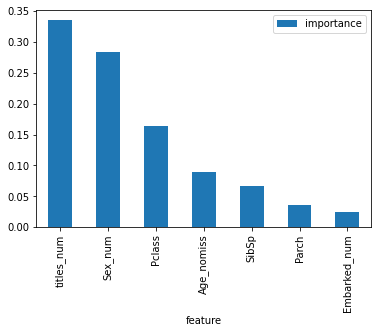

In [26]:
importances = pd.DataFrame({'feature': X.columns,'importance': rf_model.feature_importances_})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances.head(10))
importances.plot.bar()

As Parch and Embarked_num does not seem to have any importance, let's drop it.

In [27]:
features2 = ['Pclass', 'Sex_num', 'Age_nomiss', 'SibSp',
            'titles_num']

X2 = train_data[features2]
y2 = train_data["Survived"]
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.1,
                                                 random_state=0,
                                                 stratify=y)

rf_model2 = RandomForestClassifier(n_estimators=200, max_depth=5, bootstrap=True, oob_score = True)

# rf_model2.fit(x_train2, y_train2)
# rf_train_predictions2 = rf_model2.score(x_train2, y_train2, sample_weight=None)
# rf_test_predictions2 = rf_model2.score(x_test2, y_test2, sample_weight=None)
# print(f'Train predictions accuracy {rf_train_predictions2}')
# print(f'Test predictions accuracy {rf_test_predictions2}')

rf_scores2 = cross_val_score(rf_model2, X2, y2, cv=5, scoring = "accuracy")
# print("Scores:", scores)
print("Mean:", rf_scores2.mean())
print("Standard Deviation:", rf_scores2.std())

Mean: 0.813709120582512
Standard Deviation: 0.019735996084705092


Results have worsen from previous RF. So no variable drop will be performed

### Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

# lr_model = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-6))
lr_model = LogisticRegression(solver='liblinear',random_state=1, tol=1e-2)

# lr_model.fit(x_train, y_train)
# lr_train_predictions = lr_model.score(x_train, y_train, sample_weight=None)
# lr_test_predictions = lr_model.score(x_test, y_test, sample_weight=None)
# print(f'Train predictions accuracy {lr_train_predictions}')
# print(f'Test predictions accuracy {lr_test_predictions}')

lr_scores = cross_val_score(lr_model, X, y, cv=5, scoring = "accuracy")
# print("Scores:", scores)
print("Mean:", lr_scores.mean())
print("Standard Deviation:", lr_scores.std())

Mean: 0.8002134203753688
Standard Deviation: 0.00864390582973646


### K Nearest Neighbor

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=4)

# knn_model.fit(x_train, y_train)
# knn_train_predictions = knn_model.score(x_train, y_train, sample_weight=None)
# knn_test_predictions = knn_model.score(x_test, y_test, sample_weight=None)
# print(f'Train predictions accuracy {knn_train_predictions}')
# print(f'Test predictions accuracy {knn_test_predictions}')

knn_scores = cross_val_score(knn_model, X, y, cv=5, scoring = "accuracy")
# print("Scores:", scores)
print("Mean:", knn_scores.mean())
print("Standard Deviation:", knn_scores.std())

Mean: 0.7699830519113678
Standard Deviation: 0.03626678574930396


### Naive-Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()

# NB_model.fit(x_train, y_train)
# NB_train_predictions = NB_model.score(x_train, y_train, sample_weight=None)
# NB_test_predictions = NB_model.score(x_test, y_test, sample_weight=None)
# print(f'Train predictions accuracy {NB_train_predictions}')
# print(f'Test predictions accuracy {NB_test_predictions}')

NB_scores = cross_val_score(NB_model, X, y, cv=5, scoring = "accuracy")
# print("Scores:", scores)
print("Mean:", NB_scores.mean())
print("Standard Deviation:", NB_scores.std())

Mean: 0.8091959073504487
Standard Deviation: 0.010173319767239111


### Perceptron

In [31]:
from sklearn.linear_model import Perceptron

Per_model = Perceptron(tol=1e-2, random_state=0)

# Per_model.fit(x_train, y_train)
# Per_train_predictions = Per_model.score(x_train, y_train, sample_weight=None)
# Per_test_predictions = Per_model.score(x_test, y_test, sample_weight=None)
# print(f'Train predictions accuracy {Per_train_predictions}')
# print(f'Test predictions accuracy {Per_test_predictions}')

Per_scores = cross_val_score(Per_model, X, y, cv=5, scoring = "accuracy")
# print("Scores:", scores)
print("Mean:", Per_scores.mean())
print("Standard Deviation:", Per_scores.std())

Mean: 0.632772581758835
Standard Deviation: 0.1200483951406239


### Linear Support Vector Machine

In [32]:
from sklearn.svm import LinearSVC

LSVM_model = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-3))

# LSVM_model.fit(x_train, y_train)
# LSVM_train_predictions = LSVM_model.score(x_train, y_train, sample_weight=None)
# LSVM_test_predictions = LSVM_model.score(x_test, y_test, sample_weight=None)
# print(f'Train predictions accuracy {LSVM_train_predictions}')
# print(f'Test predictions accuracy {LSVM_test_predictions}')

LSVM_scores = cross_val_score(LSVM_model, X, y, cv=5, scoring = "accuracy")
# print("Scores:", scores)
print("Mean:", LSVM_scores.mean())
print("Standard Deviation:", LSVM_scores.std())

Mean: 0.7968489109283786
Standard Deviation: 0.011037534393038048


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Models wrap up

In [33]:
scores_list = [sgd_scores, rf_scores, rf_scores2, lr_scores, 
              knn_scores, NB_scores, Per_scores, LSVM_scores]
score_list_mean = [x.mean() for x in scores_list]
results = pd.DataFrame({
    'Model': ['Stochastic Gradient Descent', 'Random Forest', 'Random Forest2','Linear Regression', 'K Nearest Neighbours', 'Naive Bayes',
              'Perceptron', 'Linear Support Vector Machine'],
    'Score': score_list_mean})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.826037,Random Forest
0.813709,Random Forest2
0.809196,Naive Bayes
0.800213,Linear Regression
0.796849,Linear Support Vector Machine
0.785613,Stochastic Gradient Descent
0.769983,K Nearest Neighbours
0.632773,Perceptron


### Random forest hyperparameter tuning

### Edited as Markdown in order to not be executed every time

from sklearn.model_selection import GridSearchCV

param_grid = { "criterion" : ["gini"],
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70],
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35],
              "n_estimators": [500, 1000, 2000]}

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X, y)
clf.best_params_

In [34]:
rf_final = RandomForestClassifier(n_estimators=1000, max_depth=5, bootstrap=True, oob_score = True, criterion='gini',
                                  min_samples_leaf=1, min_samples_split=25)

rf_final_scores = cross_val_score(rf_final, X, y, cv=5, scoring = "accuracy")
# print("Scores:", scores)
print("Mean:", rf_final_scores.mean())
print("Standard Deviation:", rf_final_scores.std())

Mean: 0.8215680120519743
Standard Deviation: 0.018390479971740387


## Final predictions

In [35]:
rf_model.fit(X, y)

predictions = rf_model.predict(test_data[features])

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
